In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Scenario

1. Generate time series for a week, every four hours (simulating real data)
2. Interpolate the data such that every minute is available
3. Filter data into above and below criteria
4. Find length of each interval above criteria
5. Calculate average length

In [257]:
from datetime import date
d0 = date(2024, 1, 1)
d1 = date(2024, 2, 1)
delta = d1 - d0
resolution = delta.days * 24 + 1 #24 hours + 1 for midnight

cycles = 360 # number of cycles
length = np.pi * cycles * 2 # 2 controls the order of the wave
offset = 3 #vertical offset

In [258]:
#start_date = '2024-01-01'
#end_date = '2024-02-01'
#date_range = pd.date_range(start=start_date, end=end_date, freq='1H')
#df = pd.DataFrame(index=date_range)
#cycles = 120
#resolution = len(df)
#offset = 3
#length = np.pi * 2 * cycles
#df['Value'] = np.sin(np.arange(0, length, length / resolution)) + offset
frequency_factor = np.random.uniform(1 - 0.5, 1 + 0.5, resolution)
index = pd.date_range(d0, periods=resolution, freq='1H')
series = pd.Series(np.sin(np.arange(0, length, length / resolution) * frequency_factor) * (offset - 0.1) + offset, index = index)

2024-01-01 00:00:00    3.000000
2024-01-01 01:00:00    0.168382
2024-01-01 02:00:00    4.654142
2024-01-01 03:00:00    0.829872
2024-01-01 04:00:00    5.587926
                         ...   
2024-01-31 20:00:00    5.467075
2024-01-31 21:00:00    2.353971
2024-01-31 22:00:00    4.163757
2024-01-31 23:00:00    3.357525
2024-02-01 00:00:00    5.390055
Freq: H, Length: 745, dtype: float64


(473352.0, 473472.0)

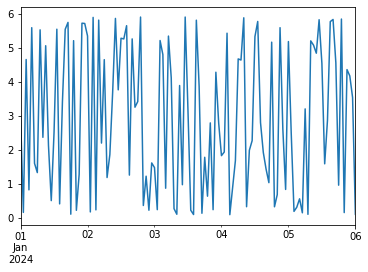

In [262]:
print(series)
ax = series.plot()
ax.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-06'))

# Input Data

# Add interpolation per minute

In [263]:
# add minute information to data
upsampled = series.resample('1min')
interpolated = upsampled.interpolate(method='quadratic')
print(interpolated.head(30))

2024-01-01 00:00:00    3.000000
2024-01-01 00:01:00    2.865997
2024-01-01 00:02:00    2.734937
2024-01-01 00:03:00    2.606819
2024-01-01 00:04:00    2.481644
2024-01-01 00:05:00    2.359412
2024-01-01 00:06:00    2.240123
2024-01-01 00:07:00    2.123776
2024-01-01 00:08:00    2.010372
2024-01-01 00:09:00    1.899910
2024-01-01 00:10:00    1.792392
2024-01-01 00:11:00    1.687816
2024-01-01 00:12:00    1.586182
2024-01-01 00:13:00    1.487492
2024-01-01 00:14:00    1.391744
2024-01-01 00:15:00    1.298938
2024-01-01 00:16:00    1.209076
2024-01-01 00:17:00    1.122156
2024-01-01 00:18:00    1.038178
2024-01-01 00:19:00    0.957144
2024-01-01 00:20:00    0.879052
2024-01-01 00:21:00    0.803903
2024-01-01 00:22:00    0.731696
2024-01-01 00:23:00    0.662433
2024-01-01 00:24:00    0.596112
2024-01-01 00:25:00    0.532733
2024-01-01 00:26:00    0.472297
2024-01-01 00:27:00    0.414804
2024-01-01 00:28:00    0.360254
2024-01-01 00:29:00    0.308646
Freq: T, dtype: float64


(28401120.0, 28409760.0)

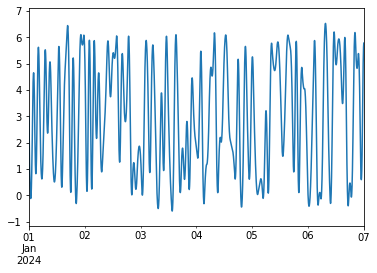

In [264]:
ax = interpolated.plot()
ax.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-7'))

# Define calculation

In [209]:
def find_above_threshold_intervals(data, threshold):
    above_threshold_intervals = []
    above_threshold = False
    start_time = None

    # Iterate through the data
    for i in range(len(data)):
        if data[i] > threshold:
            if not above_threshold:
                above_threshold = True #Sets the data[i] to be true for above above treshold
                start_time = i
        else:
            if above_threshold:
                above_threshold = False #Sets the data[i] to be false for above above treshold
                above_threshold_intervals.append((start_time, i - 1))
                start_time = None

    # Check if the last interval extends until the end of the data
    if above_threshold:
        above_threshold_intervals.append((start_time, len(data) - 1))

    return above_threshold_intervals

def calculate_interval_lengths(intervals):
    lengths = []
    for interval in intervals:
        start_time, end_time = interval
        lengths.append(end_time - start_time + 1)  # Add 1 to include both start and end times
    return lengths

In [210]:
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [273]:
import math
from statistics import mean
def calculate_intervals_daily(data, threshold):
    start_date = list()
    lengths = list()
    chunks = list()
    index = []
    num_chunks = len(data) // 1440
    for i in range(num_chunks):
        chunks.append(data[i*1440:(i+1)*1440])
    
    for chunk in chunks:
        length = list()
        above_threshold_intervals = []
        above_threshold = False
        start_time = None
        start_date.append(chunk.index[0])
    # Iterate through the data
        for i in range(len(chunk)): #1440 denotes time until the next day
            if data[i] > threshold:
                if not above_threshold:
                    above_threshold = True #Sets the data[i] to be true for above above treshold
                    start_time = i
            else:
                if above_threshold:
                    above_threshold = False #Sets the data[i] to be false for above above treshold
                    above_threshold_intervals.append((start_time, i - 1))
                    start_time = None
    # Check if the last interval extends until the end of the data
        if above_threshold:
            above_threshold_intervals.append((start_time, len(chunk) - 1))
        for interval in above_threshold_intervals:
            start_time, end_time = interval
            length.append(end_time - start_time + 1)  # Add 1 to include both start and end times  
        lengths.append(mean(length))

    length_series = pd.Series(lengths, index = start_date)
    return length_series

In [277]:
from statistics import mean
example_wave = find_above_threshold_intervals(interpolated,5)
example_interval = calculate_interval_lengths(example_wave)
print(example_wave)
print(example_interval)
print("Average length above threshold is ",mean(example_interval), "minutes")

[(227, 261), (404, 438), (536, 549), (754, 790), (941, 1029), (1133, 1151), (1307, 1444), (1543, 1576), (1667, 1703), (2008, 2067), (2148, 2290), (2394, 2424), (2548, 2594), (2997, 3056), (3174, 3222), (3525, 3573), (3768, 3822), (4421, 4450), (4755, 4813), (5033, 5119), (5390, 5407), (5567, 5606), (5755, 5779), (6237, 6305), (6372, 6468), (6640, 6771), (6881, 6915), (7347, 7392), (7612, 7695), (7848, 7919), (7936, 8049), (8130, 8174), (8386, 8450), (8483, 8518), (8626, 8661), (9103, 9139), (9279, 9327), (9666, 9710), (10011, 10052), (10229, 10246), (10362, 10399), (10741, 10805), (10966, 11012), (11170, 11269), (11371, 11419), (11731, 11757), (12107, 12192), (12458, 12496), (12783, 12794), (12934, 12976), (13115, 13155), (13612, 13631), (14204, 14236), (14669, 14713), (15039, 15111), (15360, 15471), (15745, 15778), (15883, 15918), (16012, 16075), (16297, 16363), (16486, 16524), (16715, 16753), (16850, 16883), (17079, 17120), (17207, 17279), (17502, 17535), (17626, 17662), (17744, 1778

In [ ]:
from statistics import mean
for chunk in 
example_wave = find_above_threshold_intervals(interpolated[:2880],5)
example_interval = calculate_interval_lengths(example_wave)
print(example_wave)
print(example_interval)
print("Average length above threshold is ",mean(example_interval), "minutes")

[(227, 261), (404, 438), (536, 549), (754, 790), (941, 1029), (1133, 1151), (1307, 1444), (1543, 1576), (1667, 1703), (2008, 2067), (2148, 2290), (2394, 2424), (2548, 2594), (2997, 3056), (3174, 3222), (3525, 3573), (3768, 3822), (4421, 4450), (4755, 4813), (5033, 5119), (5390, 5407), (5567, 5606), (5755, 5779), (6237, 6305), (6372, 6468), (6640, 6771), (6881, 6915), (7347, 7392), (7612, 7695), (7848, 7919), (7936, 8049), (8130, 8174), (8386, 8450), (8483, 8518), (8626, 8661), (9103, 9139), (9279, 9327), (9666, 9710), (10011, 10052), (10229, 10246), (10362, 10399), (10741, 10805), (10966, 11012), (11170, 11269), (11371, 11419), (11731, 11757), (12107, 12192), (12458, 12496), (12783, 12794), (12934, 12976), (13115, 13155), (13612, 13631), (14204, 14236), (14669, 14713), (15039, 15111), (15360, 15471), (15745, 15778), (15883, 15918), (16012, 16075), (16297, 16363), (16486, 16524), (16715, 16753), (16850, 16883), (17079, 17120), (17207, 17279), (17502, 17535), (17626, 17662), (17744, 1778

In [275]:
from statistics import mean
example_wave = calculate_intervals_daily(interpolated,5)
#example_interval = calculate_interval_lengths(example_wave)
print(example_wave)
#print(example_interval)
#print(pd.Series(example_interval).describe())
#print("Daily average length above threshold is ",mean(example_interval), "minutes")

2024-01-01    51.714286
2024-01-02    51.714286
2024-01-03    51.714286
2024-01-04    51.714286
2024-01-05    51.714286
2024-01-06    51.714286
2024-01-07    51.714286
2024-01-08    51.714286
2024-01-09    51.714286
2024-01-10    51.714286
2024-01-11    51.714286
2024-01-12    51.714286
2024-01-13    51.714286
2024-01-14    51.714286
2024-01-15    51.714286
2024-01-16    51.714286
2024-01-17    51.714286
2024-01-18    51.714286
2024-01-19    51.714286
2024-01-20    51.714286
2024-01-21    51.714286
2024-01-22    51.714286
2024-01-23    51.714286
2024-01-24    51.714286
2024-01-25    51.714286
2024-01-26    51.714286
2024-01-27    51.714286
2024-01-28    51.714286
2024-01-29    51.714286
2024-01-30    51.714286
2024-01-31    51.714286
dtype: float64
